In [47]:
import numpy as np
import matplotlib.pyplot as plt
import time

def signal(x):
    return np.cos(15*x + 5) - np.sin(5*x - 10)

period = 1.26
x = np.arange(-10.24,10.24,0.01)
w = [2*np.pi*k*0.01/period - 50  for k in range(len(x))] #частотная ось
data = signal(x)

# Функции

In [48]:
def DFT(data):
    N = len(data)
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, data)

def rev_DFT(data):
    N = len(data)
    k = np.arange(N)
    n = k.reshape((N, 1))
    M = np.exp(2j * np.pi * k * n / N)/N
    return np.dot(M, data)

def FFT(data):  
    N = len(data)
    
    if N <= 32:  
        return DFT(data)
    else:
        data_even = FFT(data[::2])
        data_odd = FFT(data[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([data_even + factor[:N // 2] * data_odd, data_even + factor[N // 2:] * data_odd])

def rev_FFT(data):  
    N = len(data)
    
    if N <= 32:  
        return rev_DFT(data)
    else:
        data_even = rev_FFT(data[::2])
        data_odd = rev_FFT(data[1::2])
        factor = np.exp(2j * np.pi * np.arange(N) / N)/2
        return np.concatenate([data_even/2 + factor[:N // 2] * data_odd, data_even/2 + factor[N // 2:] * data_odd])

# Дискретное преобразование Фурье

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Дискретный Фурье: 0.575 секунд


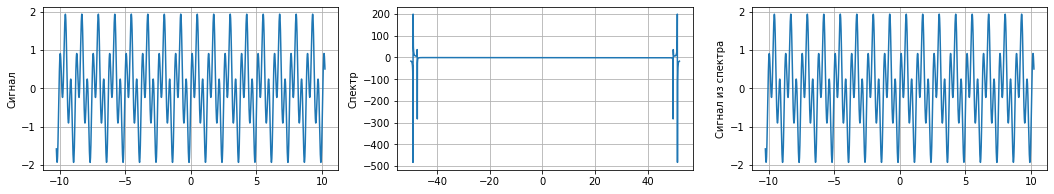

In [49]:
fig = plt.figure(figsize=(18, 3))

plt.subplot(1,3,1)
plt.plot(x,data)
plt.ylabel("Сигнал")
plt.grid()

tic = time.perf_counter() 
data1_s = DFT(data)

plt.subplot(1,3,2)
plt.plot(w,data1_s)
plt.ylabel("Спектр")
plt.grid()
 
plt.subplot(1,3,3)
plt.plot(x,rev_DFT(data1_s))
plt.ylabel("Сигнал из спектра")
plt.grid()
toc = time.perf_counter()

t1 = toc - tic
print(f"Дискретный Фурье: {t1:0.3f} секунд")

# Быстрое преобразование Фурье

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Быстрый Фурье: 0.034 секунд


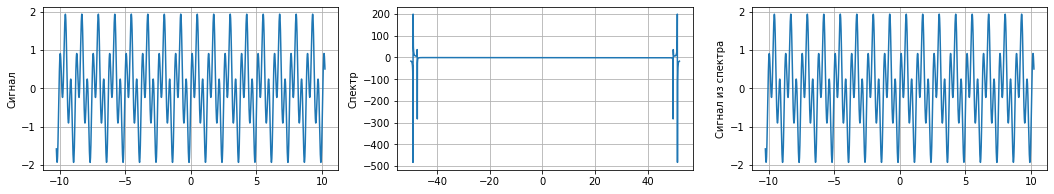

In [50]:
fig = plt.figure(figsize=(18, 3))

plt.subplot(1,3,1)
plt.plot(x,data)
plt.ylabel("Сигнал")
plt.grid()

tic = time.perf_counter() 
data2_s = FFT(data)

plt.subplot(1,3,2)
plt.plot(w,data2_s) 
plt.ylabel("Спектр")  
plt.grid()

plt.subplot(1,3,3)
plt.plot(x,rev_FFT(data2_s))
plt.ylabel("Сигнал из спектра")  
plt.grid()
toc = time.perf_counter() 

t2 = toc - tic
print(f"Быстрый Фурье: {t2:0.3f} секунд")

# Встроенное быстрое пребразование

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Встроенный быстрый Фурье: 0.025 секунд


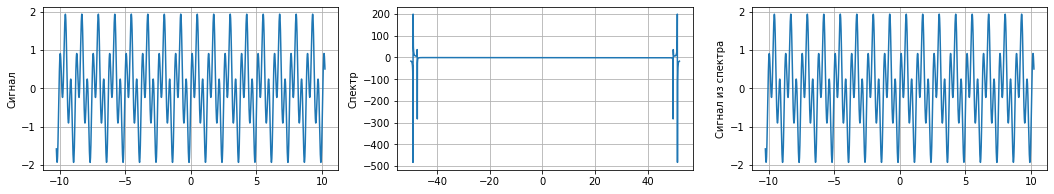

In [51]:
fig = plt.figure(figsize=(18, 3))

plt.subplot(1,3,1)
plt.plot(x,data)
plt.ylabel("Сигнал")
plt.grid()

tic = time.perf_counter() 
data3_s = np.fft.fft(data)

plt.subplot(1,3,2)
plt.plot(w,data3_s) 
plt.ylabel("Спектр")  
plt.grid()

plt.subplot(1,3,3)
plt.plot(x,np.fft.ifft(data3_s))
plt.ylabel("Сигнал из спектра")  
plt.grid()
toc = time.perf_counter() 

t3 = toc - tic
print(f"Встроенный быстрый Фурье: {t3:0.3f} секунд")

In [52]:
print(f"DFT: {t1:0.3f}s \nFFT: {t2:0.3f}s \nnp.fft: {t3:0.3f}s")

DFT: 0.575s 
FFT: 0.034s 
np.fft: 0.025s
